In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("preprocessing_1.csv", index_col=0)
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Engine/Cylinders
6,1,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0,0.373460,0.450000
12,10,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0,0.130756,0.500000
17,17,SUV - STANDARD,2.3,4.0,AS6,X,19.920319,14.245014,16.891892,263.0,1.000000,0.575000
19,16,SUV - STANDARD,5.3,8.0,A6,X,6.609385,2.376991,20.299029,335.0,0.312514,0.662500
22,1,STATION WAGON - SMALL,3.5,6.0,M6,X,8.610000,11.580000,9.737098,158.0,0.373460,0.583333
29,13,SUV - SMALL,3.5,6.0,AS8,X,5.624297,10.720000,7.142857,259.0,0.461691,0.583333
38,3,SUV - SMALL,1.3,4.0,A9,X,14.124054,8.857396,22.061773,206.0,0.567859,0.325000
44,11,SUV - SMALL,6.2,8.0,AS8,Z,29.830003,3.127932,3.437607,222.0,0.033667,0.775000
45,16,TWO-SEATER,6.2,8.0,AS8,Z,5.524862,47.485071,5.710000,280.0,0.312514,0.775000
53,19,MID-SIZE,6.2,8.0,A8,Z,30.394965,54.010384,4.739336,414.0,0.117781,0.775000


In [3]:
df["MakeAvg"].unique()

array([0.37345983, 0.13075558, 1.        , 0.31251435, 0.46169112,
       0.56785861, 0.03366713, 0.11778104, 0.22159697, 0.23280612,
       0.34317102, 0.10750999, 0.26139095, 0.01470374, 0.37226497,
       0.18105332, 0.07969936, 0.16651708, 0.        , 0.13738198,
       0.40917622])

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

# model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=tf.keras.metrics.RootMeanSquaredError())
model.compile(loss="mse", optimizer=tf.keras.optimizers.RMSprop(1e-2), metrics=tf.keras.metrics.RootMeanSquaredError())
# col_train=["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]
# col_train=["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "Make", "Cylinders"]
# col_train= ["Engine Size(L)", "Make","Cylinders"]
col_train = ["Make", "Engine Size(L)", "Cylinders", "Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]

history=model.fit(df[col_train], df["CO2 Emissions(g/km)"], epochs=50, validation_split=0.2)

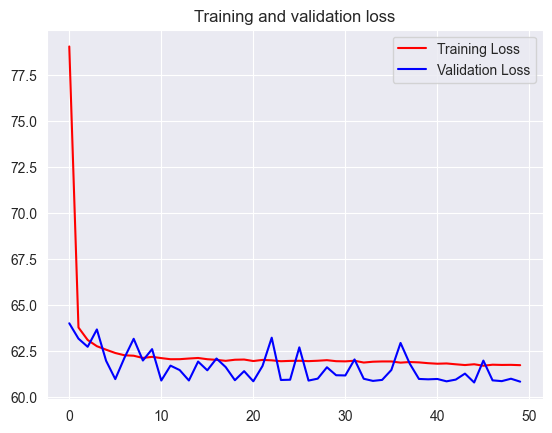

In [10]:
loss = np.sqrt(history.history['loss'])
val_loss = np.sqrt(history.history['val_loss'])

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()